# K-Means Clustering (Cassandra Employees Segmentation)

## Explanation

### Objective

create a machine learning model that can cluster an Employees based on the Employee Data, using K-Means Clustering algorithm.

### Column Descriptions

- ***Employee_number*** = Unique identifier for each employee (ID).
- ***Employee_name*** = The full name of the employee.
- ***Employee_age*** = The age of the employee in years.
- ***Maritial_Status*** = Marital status of the employee (True = Married, False = Single).
- ***Current_Salary*** = The current annual salary of the employee.
- ***Number_of_Children*** = Total number of children the employee has.
- ***years_experience*** = Total professional working experience in years.
- ***past_projects*** = Number of completed projects in previous roles or history.
- ***current_projects*** = Number of active projects currently assigned.
- ***Divorced_earlier*** = Indicates if the employee has a history of divorce (Yes/No).
- ***Father_alive*** = Indicates if the employee's father is still alive (Yes/No).
- ***Mother_alive*** = Indicates if the employee's mother is still alive (Yes/No).
- ***performance_rating*** = Evaluation score of the employee's performance (Scale 1-5).
- ***Education_level*** = The highest level of education obtained (e.g., Bachelor's, Master's).
- ***Department*** = The specific functional department within the company.
- ***Role*** = The specific job title or designation of the employee.
- ***Job_Satisfaction*** = Self-reported satisfaction score with the current job.
- ***Work_Life_Balance*** = Self-reported score regarding the balance between work and personal life.
- ***is_outlier*** = A pre-calculated binary flag indicating if the data point is considered an outlier (0 = Normal, 1 = Outlier).

## A. Data Preparation

### A.1 Import Libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [22]:
try:
    df = pd.read_csv('Employee_Complete_Dataset.csv')
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [23]:
df.shape

(50000, 19)

### A.4 Viewing Data Informations

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_number     50000 non-null  int64  
 1   Employee_name       50000 non-null  object 
 2   Employee_age        50000 non-null  int64  
 3   Maritial_Status     50000 non-null  bool   
 4   Current_Salary      50000 non-null  int64  
 5   Number_of_Children  50000 non-null  int64  
 6   years_experience    50000 non-null  int64  
 7   past_projects       50000 non-null  int64  
 8   current_projects    50000 non-null  int64  
 9   Divorced_earlier    50000 non-null  object 
 10  Father_alive        50000 non-null  object 
 11  Mother_alive        50000 non-null  object 
 12  performance_rating  50000 non-null  int64  
 13  Education_level     50000 non-null  object 
 14  Department          50000 non-null  object 
 15  Role                50000 non-null  object 
 16  Job_

### A.5 Viewing Data Statistics

In [25]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Employee_number,50000.00,35000.50,14433.90,10001.00,22500.75,35000.50,47500.25,60000.00
Employee_age,50000.00,34.70,9.61,16.00,28.00,35.00,41.00,85.00
Current_Salary,50000.00,58396.14,31415.29,15128.00,33581.00,53029.00,73750.00,695267.00
Number_of_Children,50000.00,1.20,1.12,0.00,0.00,1.00,2.00,3.00
years_experience,50000.00,8.30,8.63,0.00,0.00,6.00,14.00,58.00
past_projects,50000.00,7.01,4.33,0.00,3.00,7.00,11.00,14.00
current_projects,50000.00,1.50,1.12,0.00,1.00,2.00,2.00,3.00
performance_rating,50000.00,3.20,0.98,1.00,3.00,3.00,4.00,5.00
Job_Satisfaction,50000.00,6.55,2.97,1.00,4.17,6.87,9.79,10.00
Work_Life_Balance,50000.00,4.52,2.86,1.00,1.98,4.04,6.61,10.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [26]:
df.head()

,Employee_number,Employee_name,Employee_age,Maritial_Status,Current_Salary,Number_of_Children,years_experience,past_projects,current_projects,Divorced_earlier,Father_alive,Mother_alive,performance_rating,Education_level,Department,Role,Job_Satisfaction,Work_Life_Balance,is_outlier
0,10001,Karen Anderson,36,True,116138,2,12,6,1,No,Yes,Yes,3,Bachelor's,R&D,Researcher,10.000000,1.936454,0
1,10002,David Taylor,34,False,82171,3,10,5,0,Yes,Yes,No,5,Diploma,HR,HR Executive,10.000000,4.077728,0
2,10003,Nina Kumar,36,False,48600,1,0,2,3,Yes,Yes,Yes,4,Diploma,Sales,Sales Manager,10.000000,3.975622,0
3,10004,John Patel,42,True,39675,1,2,4,2,Yes,Yes,Yes,3,Diploma,Engineering,Software Engineer,1.000000,3.790951,0
4,10005,Emily Sharma,27,True,161304,3,3,11,2,Yes,Yes,Yes,2,High School,R&D,Scientist,8.251833,10.000000,0


In [27]:
df.tail()

,Employee_number,Employee_name,Employee_age,Maritial_Status,Current_Salary,Number_of_Children,years_experience,past_projects,current_projects,Divorced_earlier,Father_alive,Mother_alive,performance_rating,Education_level,Department,Role,Job_Satisfaction,Work_Life_Balance,is_outlier
49995,59996,Olivia Singh,34,True,30000,1,10,8,2,No,No,Yes,3,Diploma,Support,Customer Specialist,1.620645,10.000000,0
49996,59997,Rohit Anderson,63,False,39817,0,30,5,1,Yes,Yes,Yes,2,Bachelor's,Support,Support Engineer,9.653380,1.826064,0
49997,59998,Olivia Taylor,39,True,30000,0,12,8,3,No,Yes,Yes,2,Diploma,Engineering,ML Engineer,4.690698,2.470172,0
49998,59999,Luke Brown,40,True,50384,1,7,3,2,No,Yes,Yes,3,Bachelor's,Finance,Senior Analyst,1.031014,2.462067,0
49999,60000,Arun Thomas,42,False,115609,2,19,4,1,No,No,Yes,5,Bachelor's,Support,Customer Specialist,8.571629,2.912378,0


### A.7 Viewing Duplicated Data

In [28]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [29]:
df.isna().sum()

Employee_number       0
Employee_name         0
Employee_age          0
Maritial_Status       0
Current_Salary        0
Number_of_Children    0
years_experience      0
past_projects         0
current_projects      0
Divorced_earlier      0
Father_alive          0
Mother_alive          0
performance_rating    0
Education_level       0
Department            0
Role                  0
Job_Satisfaction      0
Work_Life_Balance     0
is_outlier            0
dtype: int64

### A.9 Viewing Outlier Data

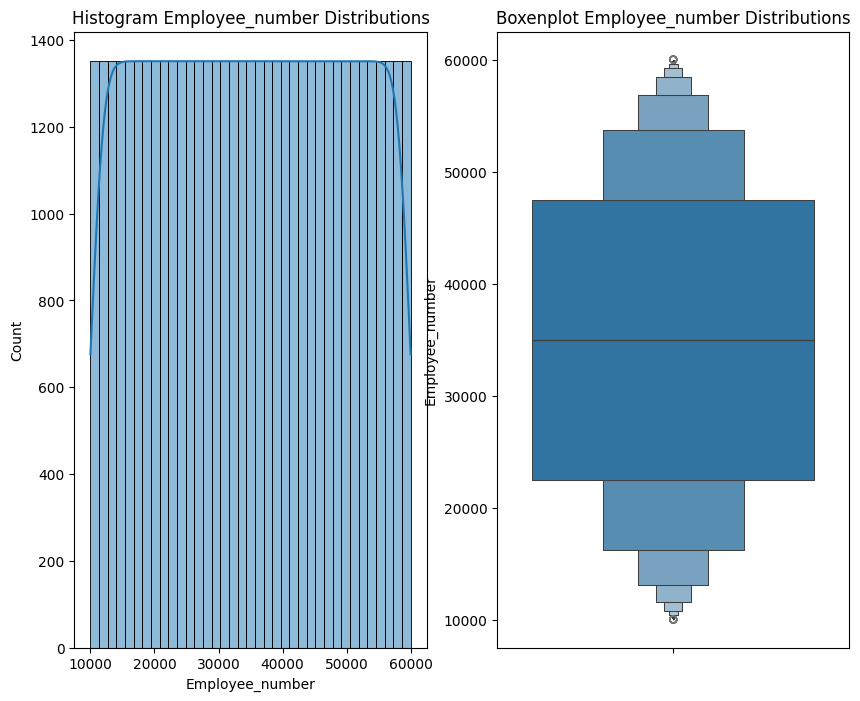

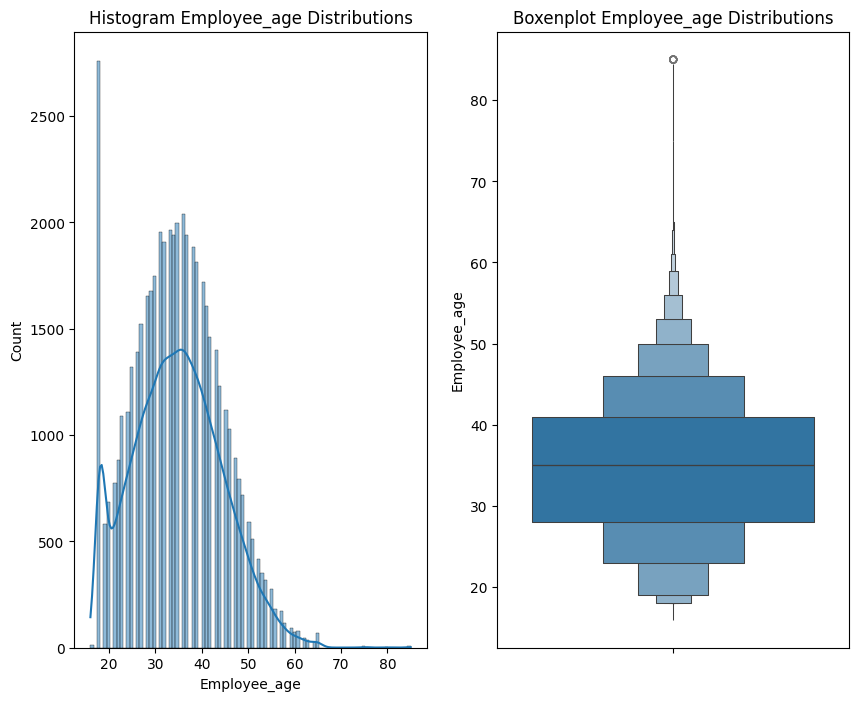

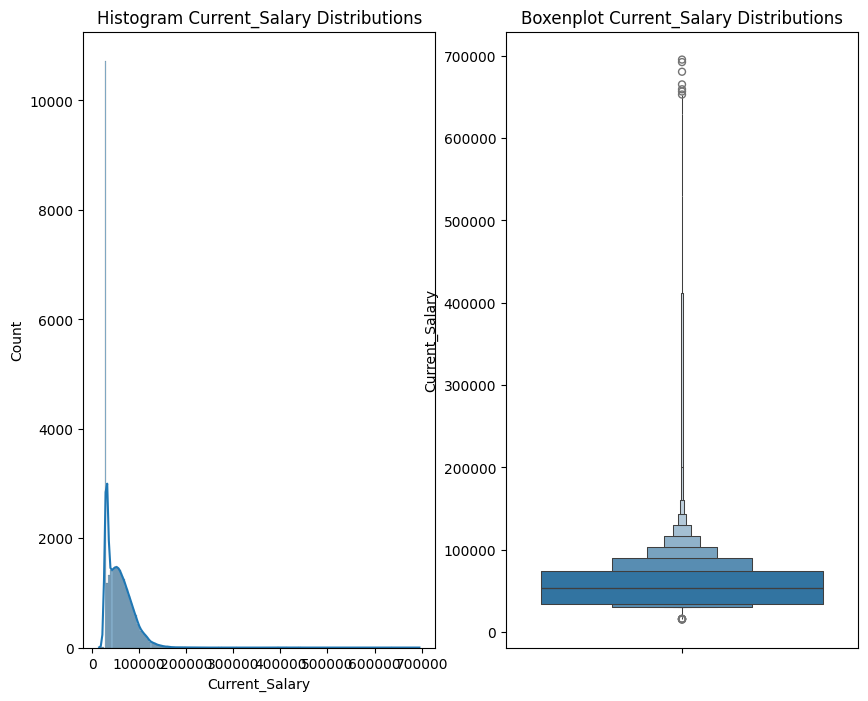

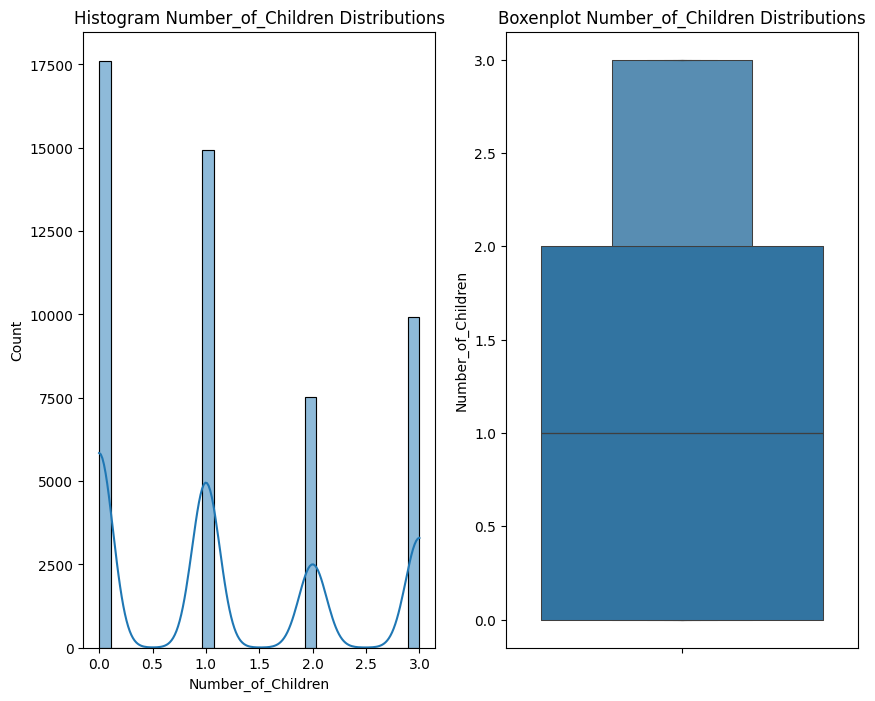

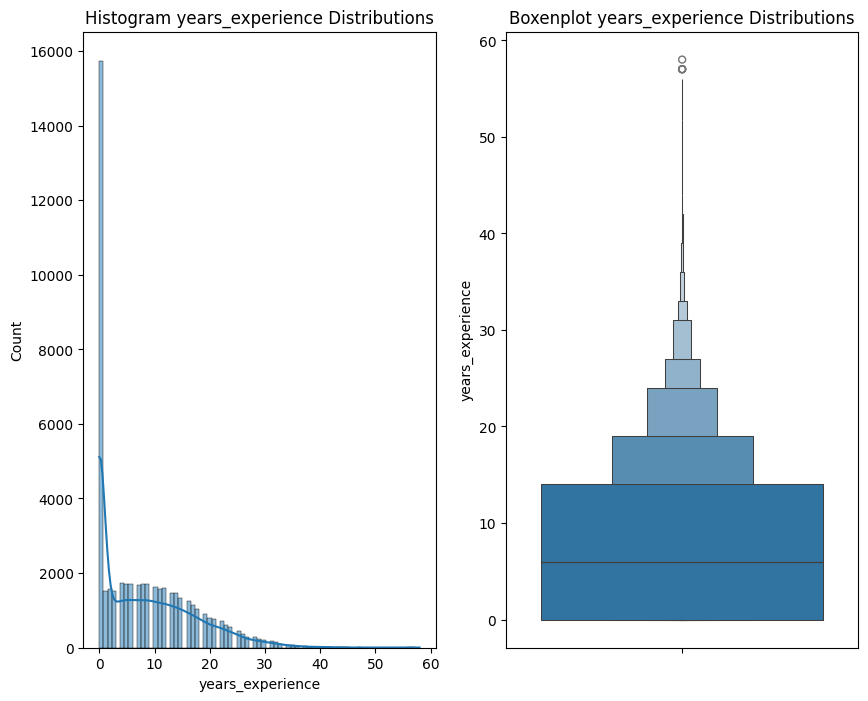

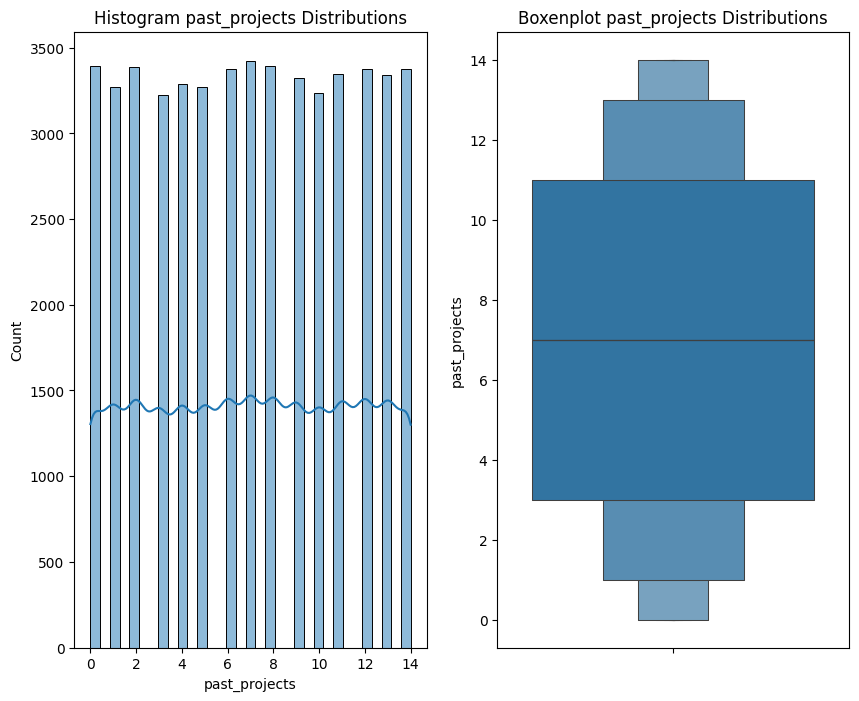

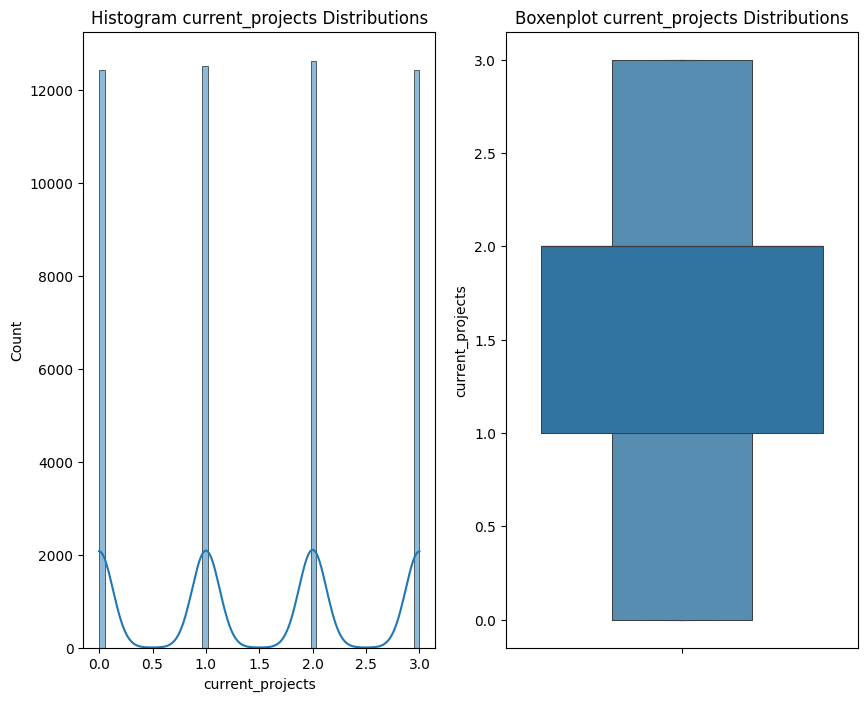

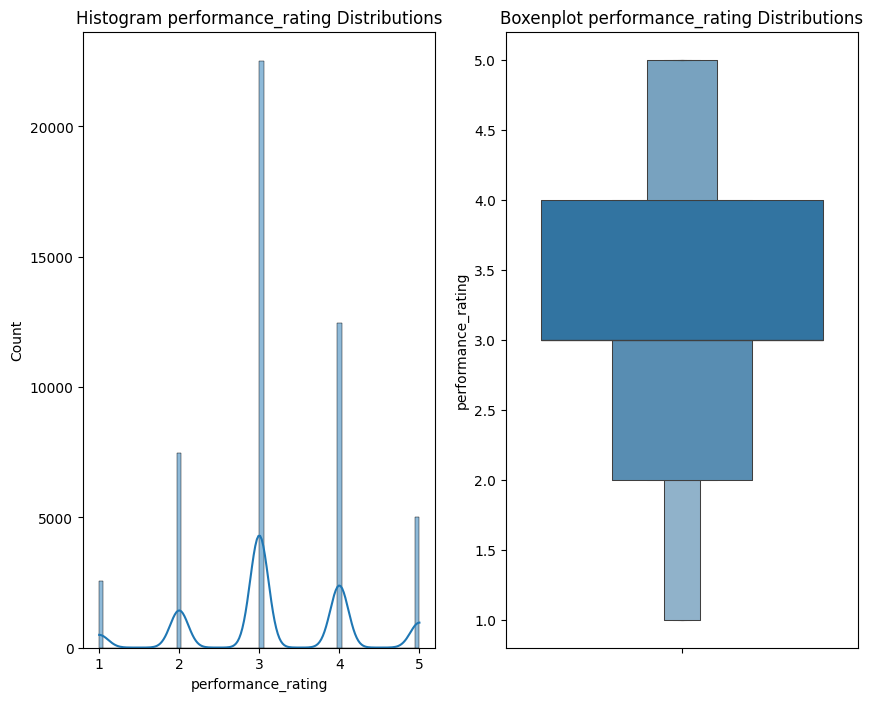

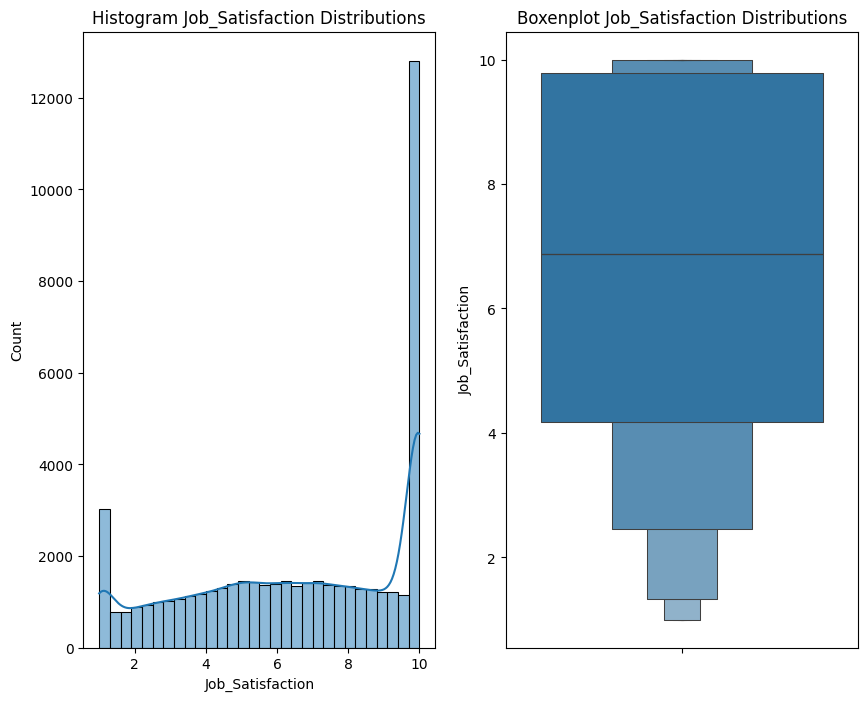

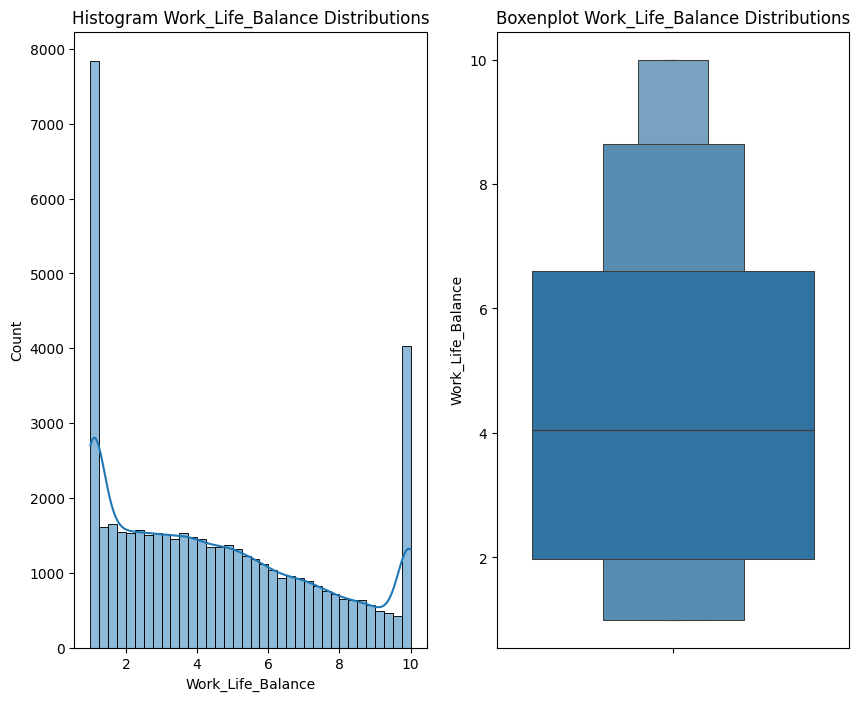

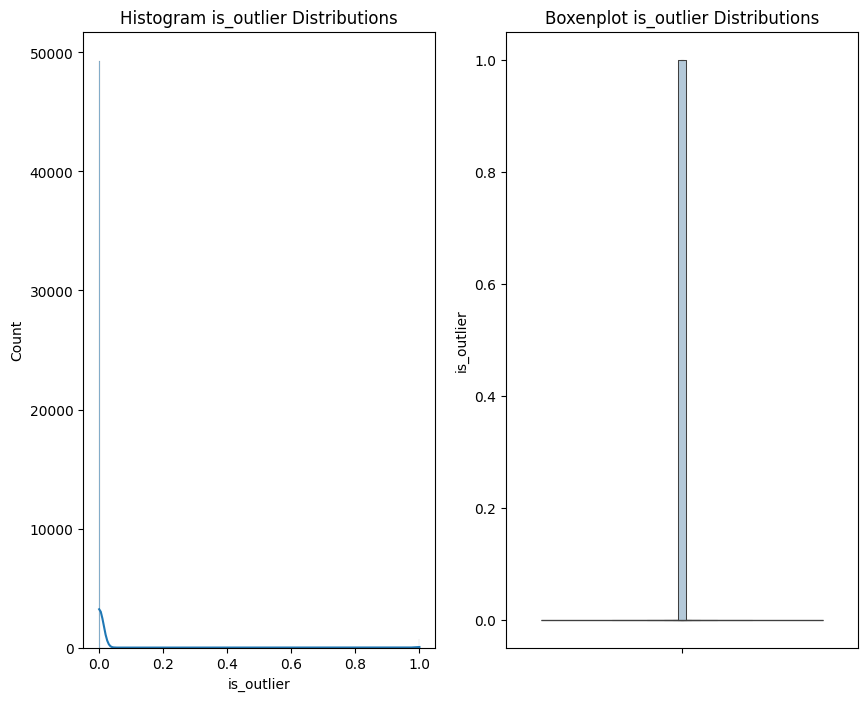

In [30]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], ax=axes[0], kde=True)
    
    axes[0].set_title(f"Histogram {col} Distributions")
    sns.boxenplot(df[col], ax=axes[1])
    axes[1].set_title(f"Boxenplot {col} Distributions")

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [31]:
df_clean = df.copy()

In [32]:
df_clean.drop(columns=['Employee_number', 'Employee_name'], inplace=True)

### B.2 Handling Outliers

In [33]:
df_clean = df_clean[df_clean['is_outlier'] == 0]

In [34]:
df_clean.drop(columns=['is_outlier'], inplace=True)

In [35]:
df_clean.shape

(49286, 16)

### B.3 Mapping Features

#### Binary Features

In [38]:
binary_mapping = {True : 1, False : 0, "Yes" : 1, "No" : 0}
binary_cols = ['Maritial_Status', 'Divorced_earlier', 'Father_alive', 'Mother_alive']

for col in binary_cols:
    df_clean[col] = df_clean[col].map(binary_mapping)

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49286 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_age        49286 non-null  int64  
 1   Maritial_Status     49286 non-null  int64  
 2   Current_Salary      49286 non-null  int64  
 3   Number_of_Children  49286 non-null  int64  
 4   years_experience    49286 non-null  int64  
 5   past_projects       49286 non-null  int64  
 6   current_projects    49286 non-null  int64  
 7   Divorced_earlier    49286 non-null  int64  
 8   Father_alive        49286 non-null  int64  
 9   Mother_alive        49286 non-null  int64  
 10  performance_rating  49286 non-null  int64  
 11  Education_level     49286 non-null  object 
 12  Department          49286 non-null  object 
 13  Role                49286 non-null  object 
 14  Job_Satisfaction    49286 non-null  float64
 15  Work_Life_Balance   49286 non-null  float64
dtypes: float6

#### Categorical Features

In [40]:
df_clean['Education_level'].unique()

array(["Bachelor's", 'Diploma', 'High School', "Master's", 'PhD'],
      dtype=object)

In [41]:
education_mapping = {'High School' : 0, 'Diploma' : 1, "Bachelor's" : 2, "Master's" : 3, 'PhD' : 4}
df_clean['Education_level'] =  df_clean['Education_level'].map(education_mapping)

In [42]:
df_clean['Education_level'].unique()

array([2, 1, 0, 3, 4])

#### One Hot Encoding

In [43]:
df_clean = pd.get_dummies(df_clean, columns=['Department', 'Role'], drop_first=True, dtype=int)

In [44]:
df_clean.head()

,Employee_age,Maritial_Status,Current_Salary,Number_of_Children,years_experience,past_projects,current_projects,Divorced_earlier,Father_alive,Mother_alive,...,Role_HR Manager,Role_ML Engineer,Role_Operations Coordinator,Role_Ops Manager,Role_Researcher,Role_Sales Manager,Role_Scientist,Role_Senior Analyst,Role_Software Engineer,Role_Support Engineer
0,36,1,116138,2,12,6,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,34,0,82171,3,10,5,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,36,0,48600,1,0,2,3,1,1,1,...,0,0,0,0,0,1,0,0,0,0
3,42,1,39675,1,2,4,2,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,27,1,161304,3,3,11,2,1,1,1,...,0,0,0,0,0,0,1,0,0,0


### B.4 Feature Engineering

#### Add New Columns

Salary Value Ratio (Salary / Years Experience)

In [ ]:
df_clean['Salary_Value_Ratio'] = df_clean['Current_Salary'] / (df_clean['years_experience'] + 1)

In [47]:
df_clean.head()

,Employee_age,Maritial_Status,Current_Salary,Number_of_Children,years_experience,past_projects,current_projects,Divorced_earlier,Father_alive,Mother_alive,...,Role_Operations Coordinator,Role_Ops Manager,Role_Researcher,Role_Sales Manager,Role_Scientist,Role_Senior Analyst,Role_Software Engineer,Role_Support Engineer,Salary_Value_Ratio,Happiness_Index
0,36,1,116138,2,12,6,1,0,1,1,...,0,0,1,0,0,0,0,0,8933.692308,5.968227
1,34,0,82171,3,10,5,0,1,1,0,...,0,0,0,0,0,0,0,0,7470.090909,7.038864
2,36,0,48600,1,0,2,3,1,1,1,...,0,0,0,1,0,0,0,0,48600.000000,6.987811
3,42,1,39675,1,2,4,2,1,1,1,...,0,0,0,0,0,0,1,0,13225.000000,2.395476
4,27,1,161304,3,3,11,2,1,1,1,...,0,0,0,0,1,0,0,0,40326.000000,9.125916


Happiness Index ( (Job Satisfaction + Work Life Balance) / 2)

In [49]:
df_clean['Happiness_Index'] = (df_clean['Job_Satisfaction'] + df_clean['Work_Life_Balance']) / 2

In [48]:
df_clean.head()

,Employee_age,Maritial_Status,Current_Salary,Number_of_Children,years_experience,past_projects,current_projects,Divorced_earlier,Father_alive,Mother_alive,...,Role_Operations Coordinator,Role_Ops Manager,Role_Researcher,Role_Sales Manager,Role_Scientist,Role_Senior Analyst,Role_Software Engineer,Role_Support Engineer,Salary_Value_Ratio,Happiness_Index
0,36,1,116138,2,12,6,1,0,1,1,...,0,0,1,0,0,0,0,0,8933.692308,5.968227
1,34,0,82171,3,10,5,0,1,1,0,...,0,0,0,0,0,0,0,0,7470.090909,7.038864
2,36,0,48600,1,0,2,3,1,1,1,...,0,0,0,1,0,0,0,0,48600.000000,6.987811
3,42,1,39675,1,2,4,2,1,1,1,...,0,0,0,0,0,0,1,0,13225.000000,2.395476
4,27,1,161304,3,3,11,2,1,1,1,...,0,0,0,0,1,0,0,0,40326.000000,9.125916


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

### C.2 Bivariate Analysis

### C.3 Multivariate Analysis